In [1]:
from src.evaluate import build_ground_truth_spans, build_prediction_spans
from src.utils import read_jsonl
from src.evaluate import NUMERIC_TO_LEVEL_2
import matplotlib.pyplot as plt


In [2]:
dataset_path = "datasets/gold_standard_dataset.jsonl"
worst_prediction_path = "results/Falcon_7B_8-bit_level_2_results.jsonl"
best_prediction_path = "results/gpt-3.5_level_2_results.jsonl"

In [3]:
def predictions_per_span(all_y_pred):
    labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
    "unknown": 0
}
    all_dict_spans = []
    for i in all_y_pred:
        dict_spans = {}
        for s in i.spans:
            if tuple(s.interval) not in dict_spans:
                dict_spans[tuple(s.interval)] = [NUMERIC_TO_LEVEL_2[s.label]]
            else:
                dict_spans[tuple(s.interval)].append(NUMERIC_TO_LEVEL_2[s.label])
        dict_spans[tuple(s.interval)] = set(dict_spans[tuple(s.interval)])
        for l in dict_spans[tuple(s.interval)]:
            labels_count[l] += 1
            
        all_dict_spans.append(dict_spans)
        
        
            
    return all_dict_spans, labels_count

In [4]:
def gold_truth_per_span(all_y_true):
    labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
}
    all_dict_spans = []
    for i in all_y_true:
        dict_spans = {}
        for s in i.spans:
            tmp_labels = []
            for l in s.labels:
                if l is not None:
                    tmp_labels.append(NUMERIC_TO_LEVEL_2[l])

            dict_spans[tuple(s.interval)] = set(tmp_labels)
            for l in dict_spans[tuple(s.interval)]:
                labels_count[l] += 1

        all_dict_spans.append(dict_spans)

        
            
    return all_dict_spans, labels_count

In [5]:
def plot_bar_labels_count(labels_count):
    plt.figure(figsize=(12, 8))
    del labels_count["nothing"]
    plt.bar(list(labels_count.keys()), labels_count.values(), color='skyblue')
    plt.ylabel('Count')
    plt.xlabel('Fallacies')
    plt.title('Count for predicted fallacies')
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()

In [6]:
gold_dataset = read_jsonl(dataset_path)
worst_pred_dataset = read_jsonl(worst_prediction_path)
best_pred_dataset = read_jsonl(best_prediction_path)

begin_instruction_tag = ""
end_instruction_tag = ""

all_y_true = []
# Build ground truth spans for each instance in the gold dataset
for i in gold_dataset:
    all_y_true.append(build_ground_truth_spans(i["text"], i["labels"]))

# Build predicted spans using the prediction dataset and the gold dataset
all_y_worst_pred = build_prediction_spans(
    worst_pred_dataset, gold_dataset, begin_instruction_tag, end_instruction_tag
)

all_y_best_pred = build_prediction_spans(
    best_pred_dataset, gold_dataset, begin_instruction_tag, end_instruction_tag
)

In [7]:
all_dict_gold_spans, gold_labels_count = gold_truth_per_span(all_y_true)

all_dict_worst_pred_spans, worst_pred_labels_count = predictions_per_span(all_y_worst_pred)

all_dict_best_pred_spans, best_pred_labels_count = predictions_per_span(all_y_best_pred)



### Distribution of the Gold Truth Labels and  Predicted Labels

#### Gold Standard

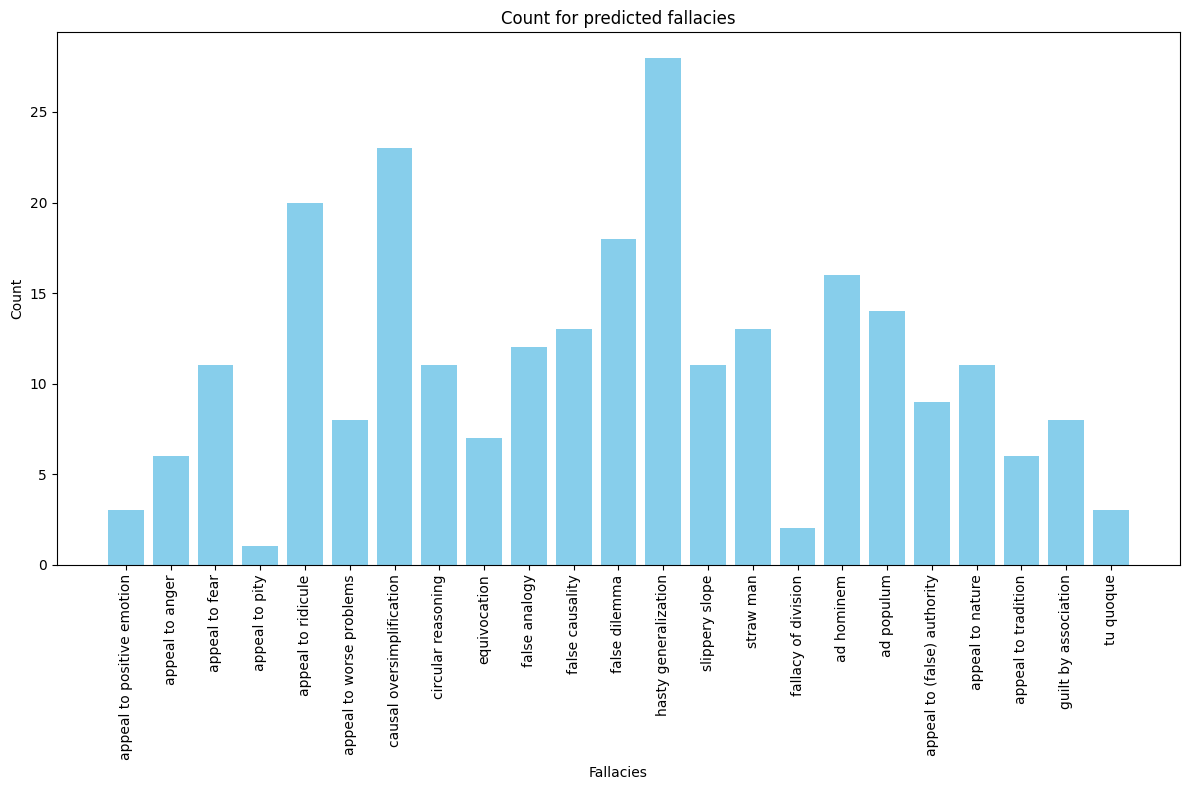

In [8]:
plot_bar_labels_count(gold_labels_count)

#### Worst Predictions

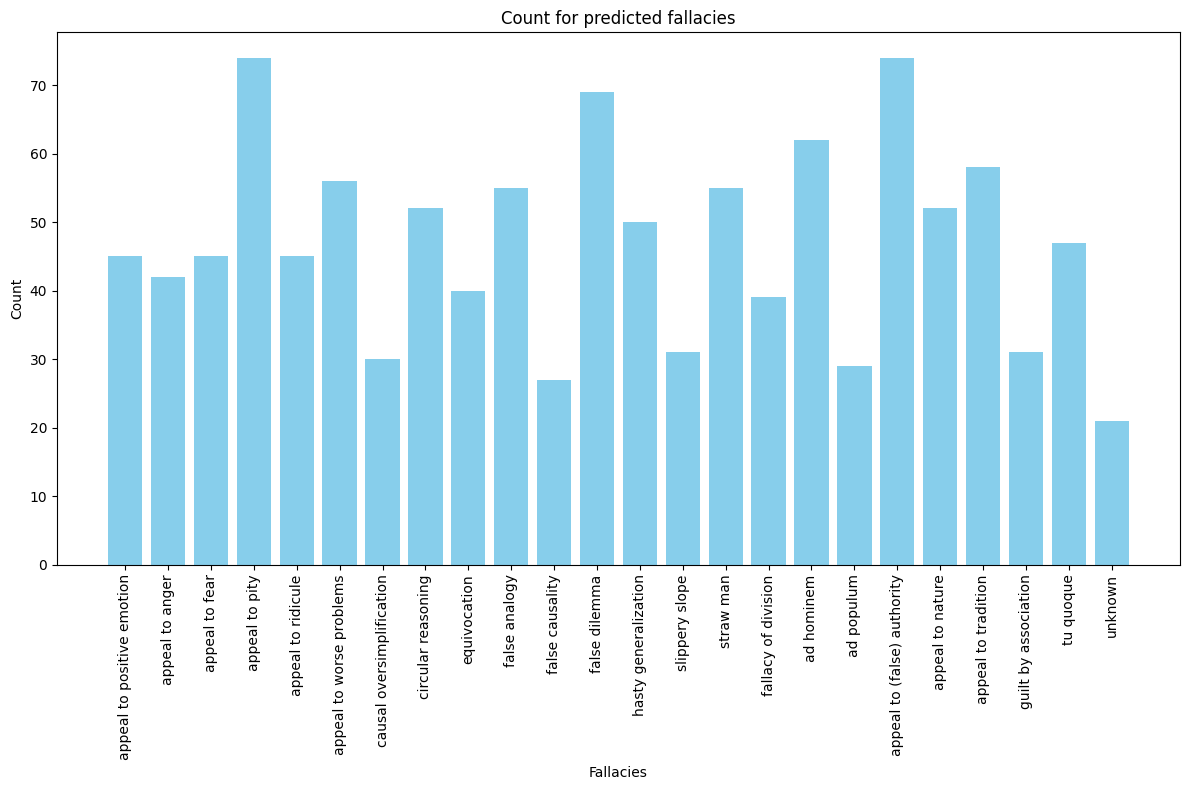

In [9]:
plot_bar_labels_count(worst_pred_labels_count)

#### Best Predictions

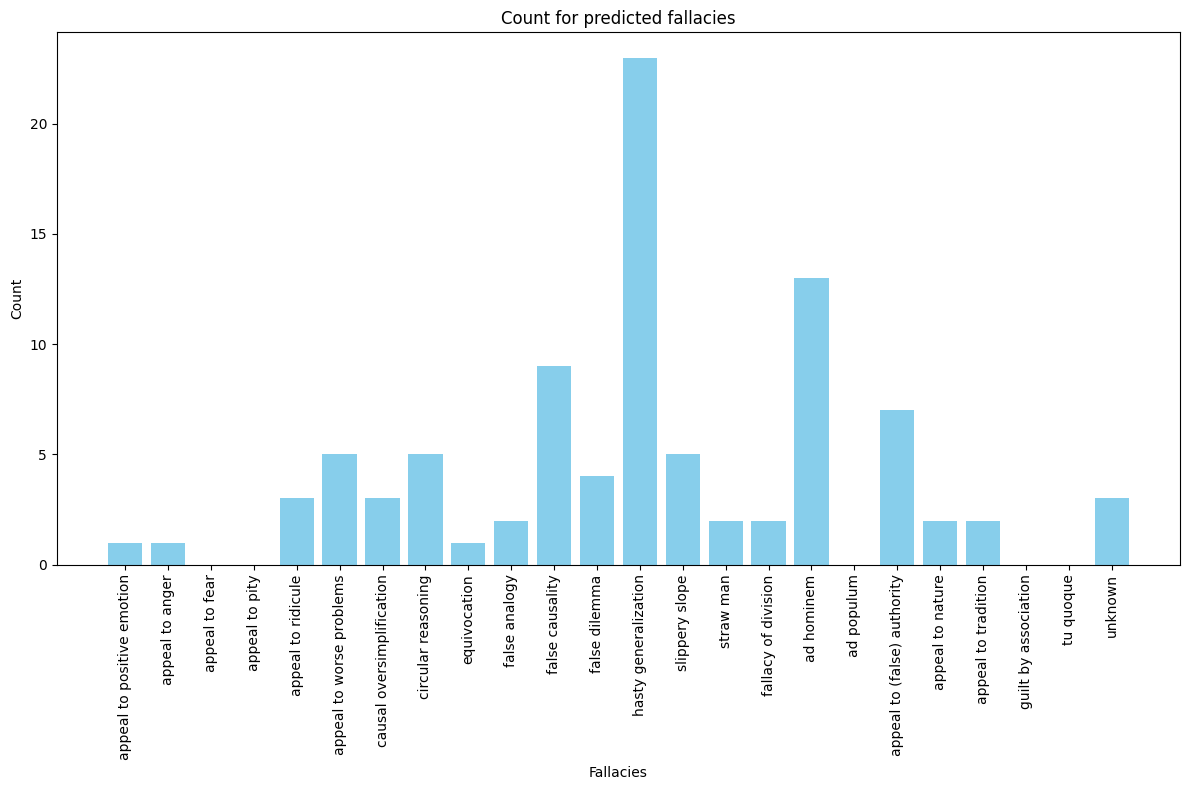

In [10]:
plot_bar_labels_count(best_pred_labels_count)

In [13]:
print(all_dict_worst_pred_spans[0])
print(all_dict_gold_spans[0])

{(0, 588): ['nothing'], (0, 154): ['appeal to positive emotion', 'appeal to anger', 'appeal to fear', 'appeal to pity', 'appeal to ridicule', 'appeal to worse problems', 'causal oversimplification', 'circular reasoning', 'false analogy', 'false dilemma', 'hasty generalization', 'straw man', 'fallacy of division'], (154, 355): ['appeal to (false) authority'], (241, 354): ['appeal to positive emotion', 'appeal to worse problems', 'circular reasoning', 'equivocation', 'false analogy', 'false dilemma', 'hasty generalization', 'slippery slope', 'straw man', 'fallacy of division', 'ad hominem', 'ad populum', 'appeal to tradition', 'guilt by association', 'tu quoque'], (354, 585): {'appeal to pity', 'appeal to anger', 'appeal to fear'}}
{(155, 588): {'slippery slope'}, (0, 154): set()}
